In [2]:
# !pip install bs4 ydata-profiling python-dotenv

In [15]:
# ! echo usr ='xxxxxxxxxxxxxxxxxxx' > credential.env                                         #removed credentials

In [16]:
# !cat credential.env

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup
from dotenv import dotenv_values
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

Send Request to website

Targeted website
* i created dummy website using open source data from kaggle

In [91]:
url = 'https://datawebscrapping.vercel.app/super_store.html'

In [92]:
usr = dotenv_values('/credential.env')

In [93]:
response =  requests.get(url ,{'user_agent':usr['usr']})
response

<Response [200]>

Using bs4 to extract data from website

In [94]:
soup =  BeautifulSoup(response.text , 'html.parser')

In [95]:
articles = soup.find_all('div', {'class':'article'})


Saving Each Articles in new text files (automatic)

In [96]:
count = 0
for i in articles:
    if i:
        with open(f"article{count+1}.txt", 'w') as arti:
            # print(i.text)
            arti.write(i.text)
            count+=1
    j = i.find('h2')
    if j:
        with open('article_title.txt','a') as tit:
            tit.write(j.text+'\n')
print('Process Done')

Process Done


##### Scrap Tables

In [98]:
tables = soup.find_all('table',{'class':'dataframe sample_1000_r'})[0]
#tables
#cleared output because when i try to convert this .ipy to a pdf also all output dispaying

In [29]:
columns = tables.find_all('th')
columns

[<th>Row ID</th>,
 <th>Order ID</th>,
 <th>Order Date</th>,
 <th>Ship Date</th>,
 <th>Ship Mode</th>,
 <th>Customer ID</th>,
 <th>Segment</th>,
 <th>Country</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Postal Code</th>,
 <th>Region</th>,
 <th>Product ID</th>,
 <th>Category</th>,
 <th>Sub-Category</th>,
 <th>Product Name</th>,
 <th>Sales</th>,
 <th>Quantity</th>,
 <th>Profit</th>]

In [30]:
#extracting column /variables from table
column =  [i.text.strip() for i in columns]
column

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Profit']

In [101]:
rows =  tables.find_all('tr')
rows[0]         #checking

<tr style="text-align: right;">
<th>Row ID</th>
<th>Order ID</th>
<th>Order Date</th>
<th>Ship Date</th>
<th>Ship Mode</th>
<th>Customer ID</th>
<th>Segment</th>
<th>Country</th>
<th>City</th>
<th>State</th>
<th>Postal Code</th>
<th>Region</th>
<th>Product ID</th>
<th>Category</th>
<th>Sub-Category</th>
<th>Product Name</th>
<th>Sales</th>
<th>Quantity</th>
<th>Profit</th>
</tr>

In [102]:
row = []
for r in rows[1:]:
    k = r.find_all('td')
    row_data = [i.text.strip() for i in k]
    row.append(row_data)


In [33]:
row[0]

['579',
 'CA-2017-118640',
 '7/20/2017',
 '7/26/2017',
 'Standard Class',
 'CS-11950',
 'Consumer',
 'United States',
 'Chicago',
 'Illinois',
 '60610',
 'Central',
 'OFF-ST-10002974',
 'Office Supplies',
 'Storage',
 'Trav-L-File Heavy-Duty Shuttle II, Black',
 '$69.71',
 '2',
 '$8.71']

Table Scrapping Done lets create dataframe to store these values

In [34]:
df = pd.DataFrame(row , columns=column)

In [35]:
df.head()
# table looks good

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,579,CA-2017-118640,7/20/2017,7/26/2017,Standard Class,CS-11950,Consumer,United States,Chicago,Illinois,60610,Central,OFF-ST-10002974,Office Supplies,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",$69.71,2,$8.71
1,5523,CA-2016-110982,06-05-2016,06-07-2016,First Class,CK-12205,Consumer,United States,Santa Clara,California,95051,West,OFF-BI-10000829,Office Supplies,Binders,Avery Non-Stick Binders,$21.55,6,$7.00
2,6415,CA-2017-142671,11-10-2017,11/14/2017,Second Class,DR-12940,Home Office,United States,Hollywood,Florida,33021,South,OFF-BI-10004099,Office Supplies,Binders,GBC VeloBinder Strips,$11.52,5,$-7.68
3,9487,CA-2017-130505,10-12-2017,10-12-2017,Same Day,NF-18385,Consumer,United States,Wheeling,West Virginia,26003,East,FUR-TA-10001932,Furniture,Tables,"Chromcraft 48"" x 96"" Racetrack Double Pedestal...",$673.34,3,$-76.95
4,9436,CA-2015-119627,8/17/2015,8/23/2015,Standard Class,SC-20725,Consumer,United States,Peoria,Arizona,85345,West,TEC-AC-10001142,Technology,Accessories,First Data FD10 PIN Pad,$252.80,4,$-31.60


## Data Cleaning/Preprocessing/Cleansing/Transformation

remove un_necessary columns/variables

In [36]:
#making all variables name to lower case  with '_'
df.columns =  df.columns.str.lower().str.replace(" ", "_")

In [37]:
df.drop(inplace =True ,  columns =['row_id', 'postal_code', 'country'] )

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      1000 non-null   object
 1   order_date    1000 non-null   object
 2   ship_date     1000 non-null   object
 3   ship_mode     1000 non-null   object
 4   customer_id   1000 non-null   object
 5   segment       1000 non-null   object
 6   city          1000 non-null   object
 7   state         1000 non-null   object
 8   region        1000 non-null   object
 9   product_id    1000 non-null   object
 10  category      1000 non-null   object
 11  sub-category  1000 non-null   object
 12  product_name  1000 non-null   object
 13  sales         1000 non-null   object
 14  quantity      1000 non-null   object
 15  profit        1000 non-null   object
dtypes: object(16)
memory usage: 125.1+ KB


The data is not in the correct format:

1. order_date and ship_date are objects instead of datetime.
2. sales, quantity, and profit should be integers or floats instead of objects.


First Change datetime

In [39]:
#data format 7/20/2017
date_cols = df[['order_date','ship_date']]

In [40]:
for col in date_cols:
    df[col] =df[col].str.replace('/', '-').str.strip()
    df[col] = pd.to_datetime(df[col] ,  format = '%m-%d-%Y')
print('process done')


process done


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      1000 non-null   object        
 1   order_date    1000 non-null   datetime64[ns]
 2   ship_date     1000 non-null   datetime64[ns]
 3   ship_mode     1000 non-null   object        
 4   customer_id   1000 non-null   object        
 5   segment       1000 non-null   object        
 6   city          1000 non-null   object        
 7   state         1000 non-null   object        
 8   region        1000 non-null   object        
 9   product_id    1000 non-null   object        
 10  category      1000 non-null   object        
 11  sub-category  1000 non-null   object        
 12  product_name  1000 non-null   object        
 13  sales         1000 non-null   object        
 14  quantity      1000 non-null   object        
 15  profit        1000 non-null   object   

Now date variables look good now need to change dtypes for sales, quantity,profit

In [42]:
#$69.71 i want to extract only 69.71 either use regex or replace😀

In [43]:
re.findall('\d+\.\d+','$69.71')[0]

'69.71'

In [44]:
df.sales = df.sales.apply(lambda x :float(re.findall('\d+\.\d+',x)[0]))

In [45]:
df.profit = df.profit.apply(lambda x :re.sub(r"[^\d.-]","",x))


In [46]:
df.profit.replace('-',0,inplace =True)

In [47]:
num_col =df[['profit','quantity']]

In [48]:
for i in num_col:
    df[i] = pd.to_numeric(df[i])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      1000 non-null   object        
 1   order_date    1000 non-null   datetime64[ns]
 2   ship_date     1000 non-null   datetime64[ns]
 3   ship_mode     1000 non-null   object        
 4   customer_id   1000 non-null   object        
 5   segment       1000 non-null   object        
 6   city          1000 non-null   object        
 7   state         1000 non-null   object        
 8   region        1000 non-null   object        
 9   product_id    1000 non-null   object        
 10  category      1000 non-null   object        
 11  sub-category  1000 non-null   object        
 12  product_name  1000 non-null   object        
 13  sales         1000 non-null   float64       
 14  quantity      1000 non-null   int64         
 15  profit        1000 non-null   float64  

Data Loooking fine now i can do some analysis using this data now

In [50]:
#do some quick EDA

report  =  ProfileReport(df)
report.to_file('quick_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Analysis and Visualization

Sales Trends:

* How sales trends changed over time? Are there any noticeable patterns or seasonality?

In [51]:
## these are custom color code i use chatgpt to generate these color code

# Warm Shades
warm_palette = ['#ff9999', '#ff6666', '#ff4d4d', '#ff3333', '#ff0000']

# Cool Blues
cool_blues_palette = ['#cce5ff', '#99c2ff', '#66b3ff', '#3399ff', '#007bff']

# Earth Tones
earth_tones_palette = ['#d9e3d8', '#b8d1c6', '#9ac9b3', '#6cb4a0', '#4e8c6f']

# Sunset Colors
sunset_palette = ['#ffcc99', '#ffb366', '#ff9933', '#ff6600', '#cc3300']

# Pastel Shades
pastel_palette = ['#f7c6c7', '#f7a6a8', '#f78180', '#f75050', '#d72027']


In [52]:
df['month'] = df.order_date.dt.month    # extraing month and year from date feature
df['year'] = df.order_date.dt.year

In [53]:
#int32 to int 64
df[['month','year']] = df[['month','year']].astype('int64')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      1000 non-null   object        
 1   order_date    1000 non-null   datetime64[ns]
 2   ship_date     1000 non-null   datetime64[ns]
 3   ship_mode     1000 non-null   object        
 4   customer_id   1000 non-null   object        
 5   segment       1000 non-null   object        
 6   city          1000 non-null   object        
 7   state         1000 non-null   object        
 8   region        1000 non-null   object        
 9   product_id    1000 non-null   object        
 10  category      1000 non-null   object        
 11  sub-category  1000 non-null   object        
 12  product_name  1000 non-null   object        
 13  sales         1000 non-null   float64       
 14  quantity      1000 non-null   int64         
 15  profit        1000 non-null   float64  

In [55]:
#pivot table
df.pivot_table(index ='year' ,columns= 'month' ,values= 'sales',aggfunc='sum').reset_index()

month,year,1,2,3,4,5,6,7,8,9,10,11,12
0,2014,987.73,321.28,3688.71,1254.39,1982.63,3952.49,2232.41,1272.92,3667.53,2826.87,4009.14,4557.28
1,2015,919.45,221.60,2011.20,2987.48,629.76,3314.64,3195.15,3243.56,4824.11,688.05,6429.57,7224.19
2,2016,2358.98,1241.72,3225.47,880.06,3052.49,2978.58,3474.89,4716.15,5303.58,1483.89,5478.64,6335.38
3,2017,2926.41,1763.55,4605.40,3115.98,3286.28,5015.95,4131.55,3916.49,6227.49,3793.36,7557.62,8411.40


In [56]:
sales_by_month = df.groupby('month').agg(Sales = ('sales','sum')).reset_index()
sales_by_month

,month,Sales
0,1,7192.57
1,2,3548.15
2,3,13530.78
3,4,8237.91
4,5,8951.16
5,6,15261.66
6,7,13034.00
7,8,13149.12
8,9,20022.71
9,10,8792.17


In [57]:
sales_by_year = df.groupby('year').agg(Sales = ('sales','sum')).reset_index()
sales_by_year

,year,Sales
0,2014,30753.38
1,2015,35688.76
2,2016,40529.83
3,2017,54751.48


Sales by Month


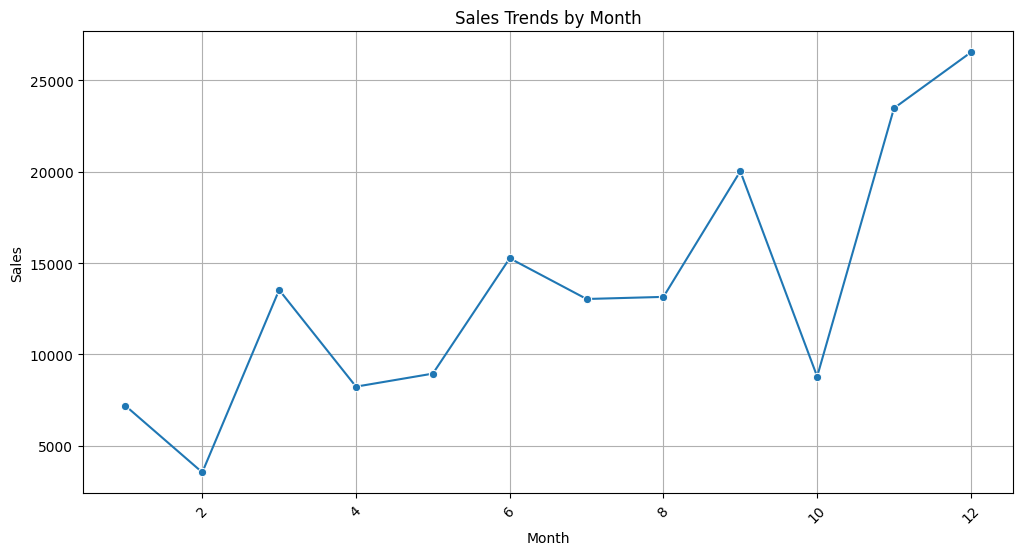

In [58]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_month, x='month', y='Sales', marker='o', palette='#d9e3d8')
plt.title('Sales Trends by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Sales by Year

Text(0, 0.5, 'Sales')

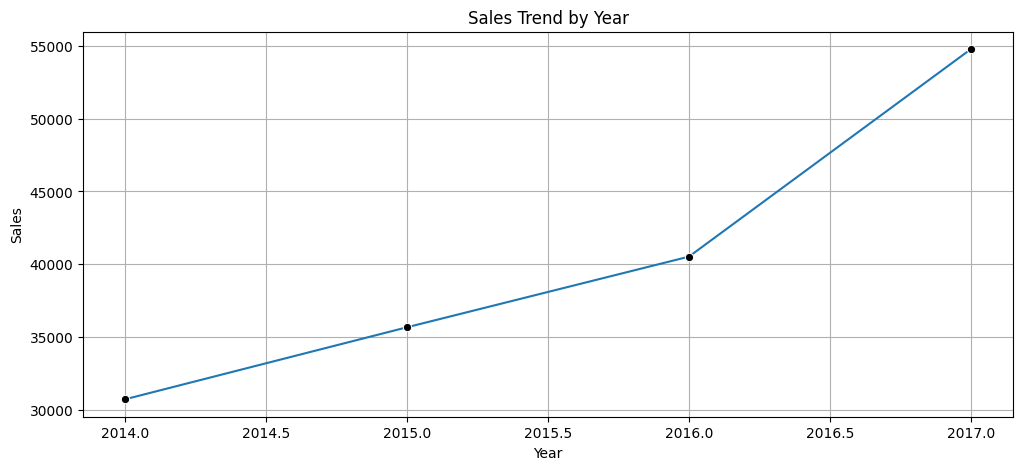

In [59]:
plt.figure(figsize=(12, 5))
sns.lineplot(sales_by_year ,  x = 'year', y ='Sales' , marker ='o', markerfacecolor = 'black')
plt.grid(True)
plt.title('Sales Trend by Year')
plt.xlabel('Year')
plt.ylabel('Sales')


Sales Performance by Region:

* Which regions have the highest and lowest sales? How does sales performance vary across different regions?

In [60]:
(df.region.value_counts(normalize=True) * 100).reset_index()


,region,proportion
0,East,29.1
1,West,29.0
2,Central,25.8
3,South,16.1


In [61]:
sales_by_region =  df.groupby('region').sales.sum().reset_index().sort_values(by = 'sales', ascending =False)
sales_by_region

,region,sales
1,East,51164.26
3,West,49839.57
0,Central,39330.36
2,South,21389.26


In [62]:
profit_by_region =  df.groupby('region').profit.sum().reset_index().sort_values(by = 'profit', ascending =False)
profit_by_region

,region,profit
3,West,9942.45
1,East,8116.86
0,Central,5626.90
2,South,4166.75


Text(0, 0.5, 'Region')

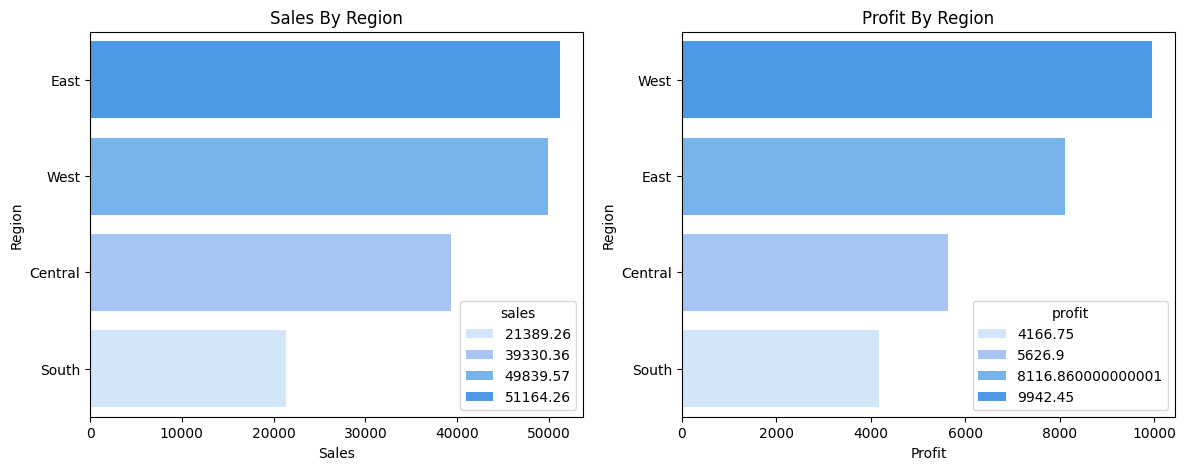

In [63]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.barplot(sales_by_region, x = 'sales' ,y = 'region', hue = 'sales' ,  palette=cool_blues_palette)
plt.title('Sales By Region')
plt.xlabel('Sales')
plt.ylabel('Region')

plt.subplot(1,2,2)
sns.barplot(profit_by_region, x = 'profit' ,y = 'region', hue = 'profit' ,  palette=cool_blues_palette)
plt.title('Profit By Region')
plt.xlabel('Profit')
plt.ylabel('Region')


Customer Segments:

* What are the sales and profit contributions from different customer segments? Which segment is the most profitable?

In [64]:
segment_contribution =df.pivot_table(index = 'segment',  values = ['sales','profit'], aggfunc ='sum' ).reset_index()
segment_contribution

,segment,profit,sales
0,Consumer,11735.49,80296.81
1,Corporate,7721.59,52535.27
2,Home Office,8395.88,28891.37


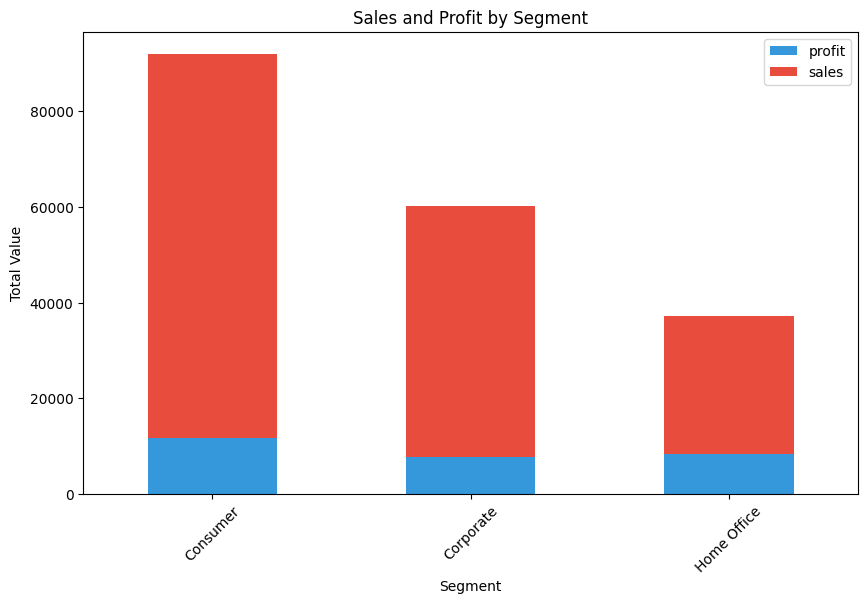

In [65]:
segment_contribution.set_index('segment').plot(kind='bar', stacked=True, figsize=(10,6), color=['#3498db', '#e74c3c'])
plt.title('Sales and Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.show()

In [66]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,region,product_id,category,sub-category,product_name,sales,quantity,profit,month,year
0,CA-2017-118640,2017-07-20,2017-07-26,Standard Class,CS-11950,Consumer,Chicago,Illinois,Central,OFF-ST-10002974,Office Supplies,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",69.71,2,8.71,7,2017
1,CA-2016-110982,2016-06-05,2016-06-07,First Class,CK-12205,Consumer,Santa Clara,California,West,OFF-BI-10000829,Office Supplies,Binders,Avery Non-Stick Binders,21.55,6,7.00,6,2016
2,CA-2017-142671,2017-11-10,2017-11-14,Second Class,DR-12940,Home Office,Hollywood,Florida,South,OFF-BI-10004099,Office Supplies,Binders,GBC VeloBinder Strips,11.52,5,-7.68,11,2017
3,CA-2017-130505,2017-10-12,2017-10-12,Same Day,NF-18385,Consumer,Wheeling,West Virginia,East,FUR-TA-10001932,Furniture,Tables,"Chromcraft 48"" x 96"" Racetrack Double Pedestal...",673.34,3,-76.95,10,2017
4,CA-2015-119627,2015-08-17,2015-08-23,Standard Class,SC-20725,Consumer,Peoria,Arizona,West,TEC-AC-10001142,Technology,Accessories,First Data FD10 PIN Pad,252.80,4,-31.60,8,2015


category and sub category sales and profit

In [67]:
cat_subCat = df.groupby(['category','sub-category']).sales.sum().reset_index().sort_values(by = ['category','sales'],ascending =[True,False ])
sub_cat_subCat =cat_subCat.sort_values(by = 'sales', ascending=False)

In [68]:
x=  df.groupby('category').sales.sum().reset_index()
x

,category,sales
0,Furniture,66927.72
1,Office Supplies,48086.39
2,Technology,46709.34


In [69]:
profit_cat =  df.groupby('category').profit.sum().reset_index().sort_values(by ='profit',ascending =False)
profit_cat


,category,profit
2,Technology,15199.78
1,Office Supplies,13570.01
0,Furniture,-916.83


In [70]:
profit_Scat =  df.groupby('sub-category').profit.sum().reset_index().sort_values(by ='profit',ascending =False)
profit_Scat

,sub-category,profit
6,Copiers,5487.94
0,Accessories,4245.45
3,Binders,3894.87
13,Phones,3279.48
12,Paper,3229.29
5,Chairs,3063.80
14,Storage,2704.90
11,Machines,2186.91
9,Furnishings,1476.56
1,Appliances,1244.22


Text(0.5, 1.0, 'Profit By Sub-Category')

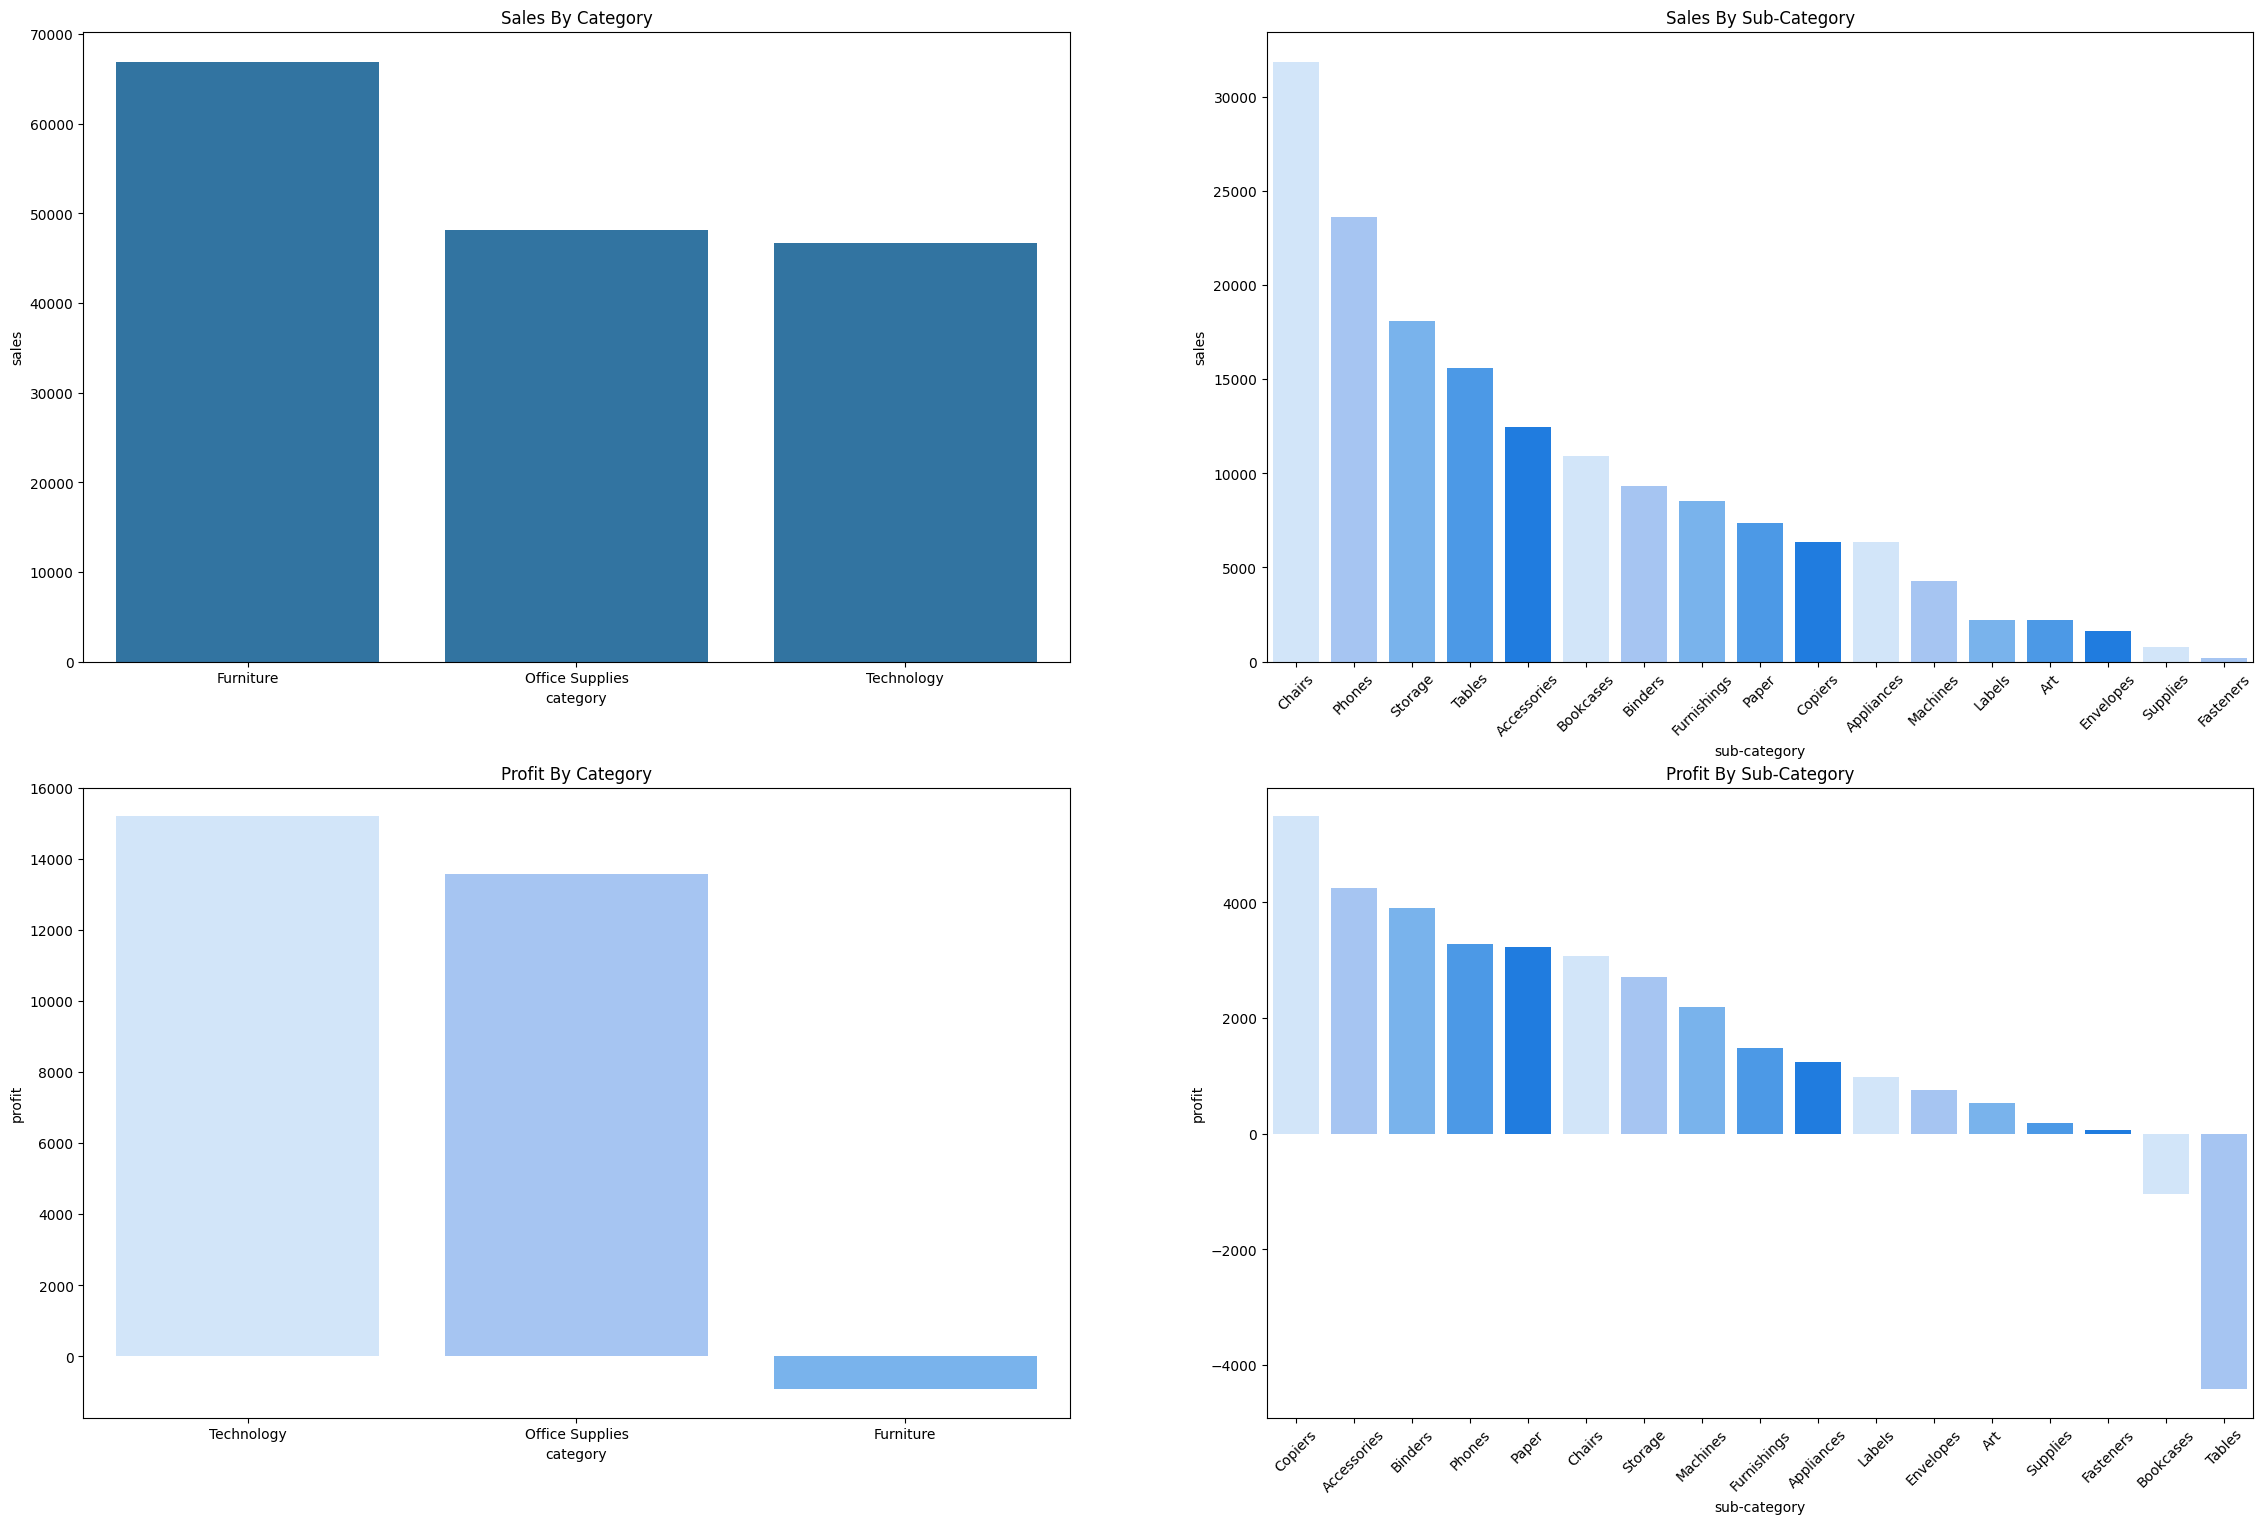

In [71]:
plt.figure(figsize =(28,18)),
plt.subplot(2,2,1)
sns.barplot(x , x ='category', y ='sales')
plt.title('Sales By Category')

plt.subplot(2,2,2)
sns.barplot(sub_cat_subCat , x = 'sub-category', y='sales' ,palette= cool_blues_palette )
plt.xticks(rotation =45 )
plt.title('Sales By Sub-Category')

plt.subplot(2,2,3)
sns.barplot(profit_cat , x = 'category', y='profit' ,palette= cool_blues_palette )
plt.title('Profit By Category')

plt.subplot(2,2,4)
sns.barplot(profit_Scat , x = 'sub-category', y='profit' ,palette= cool_blues_palette )
plt.xticks(rotation =45 )
plt.title('Profit By Sub-Category')

### Table scapping without bs4 using pandas

Pandas only scrapes/extracts tables from webpages with less control over data
* In BeautifulSoup (bs4), we can scrape whatever we want, including text, tables, and other content.
* Note: 😀 With Authorized Access

In [72]:
medals = pd.read_html('https://en.wikipedia.org/wiki/2024_Summer_Olympics_medal_table')

In [73]:
type(medals)

list

In [74]:
len(medals)

8

In [75]:
df = medals[3]

In [77]:
df.head()

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,United States‡,40,44,42,126
1,2,China,40,27,24,91
2,3,Japan,20,12,13,45
3,4,Australia,18,19,16,53
4,5,France*,16,26,22,64


# **Thank you**🙃

In [105]:
!jupyter nbconvert --execute --to html /content/file_updated.ipynb

[NbConvertApp] Converting notebook /content/file_updated.ipynb to html
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] Writing 1131851 bytes to /content/file_updated.html


In [85]:
# !jupyter nbconvert --execute --to pdf /content/scrap.ipynb